<h3> 1. Code 1은 'wine-clustering.csv' 파일을 읽어와서 두 가지 방식의 클러스터링을 수행하고 그 결과를 scatter plot으로 나타내는 코드입니다. 각각의 clustering 방법은 함수로 만들어져 있으며 다음을 입력으로 받습니다. 전체 데이터 X, 초기 뮤의 위치, 정해진 반복횟수 max_iter</h3>

- 전체 코드가 정상적으로 동작하도록 두 번째 cell에 train_kmeans 함수를 ㅗ안성하세요.
- 전체 코드가 정상적으로 동작하도록 세 번째 cell에 train_MoG 함수를 완성하세요. 단, 초기 값으로 convariance는 identity, mixing coefficient는 uniform으로 합니다. 

  

In [22]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
X=np.genfromtxt('wine-clustering.csv', delimiter=',', skip_header=1)
#dilimiter=','는 구분자는 쉼표로 하겠다는 뜻

print(X.shape)

Xmin=np.min(X, axis=0)
Xmax=np.max(X, axis=0)
X=(X-Xmin)/Xmax

(N,D)=X.shape
#X.shape=(178,13) 
#와인을 구분하는 측도 13가지

(178, 13)


In [23]:
def train_kmeans(X, mu_init, maxIter):
    #mu_init.shape=(13,2) 즉 (D,K)

    (D,K)=mu_init.shape
    mu_tr=np.zeros((K,D,maxIter)) 
    mu_tr[:,:,0]=mu_init.T
    dist=np.zeros((N,K))
    mu=mu_init

   
    # perands could not be broadcast together with shapes (178,13) (1,2314) 
    
    for iter in range(maxIter):   
        for k in range(K):

            #mu[:,k].shape= Dx1
            #좌측항 결과 Dx1
            dist[:,k]=np.sum((X-np.matlib.repmat(mu[:,k],N,1))**2, axis=1)
        labels=np.argmin(dist, axis=1)
        
        for k in range(K):
            mu[:,k]=np.mean(X[labels==k,:],axis=0)
        mu_tr[:,:,iter]=mu.T
    return labels

In [24]:
def train_MoG(X, mu_init, maxIter):
    X=X.T
    (D,K)=mu_init.shape
    #mixing_coeficient Kx1
    pi=np.random.rand(K)
    pi=pi/np.sum(pi)
    #mean DxK
    mu=np.random.rand(D,K)
    #covariance DxDxK
    sigma=np.zeros((D,D,K))
    for k in range(K):
        sigma[:,:,k]=1e-2*np.identity(D)
    #N = responsibility의 총합 (responsibility = k클러스터에서 나왔을 확률) Kx1
    #Nk는 k번째 클러스터에 속하는 샘플개수
    Num=np.zeros(K)
    #감마 = respoinsibility값 KxN
    gamma=np.zeros((K,N))
    
    for iter in range(maxIter):
        #E-step
        for k in range(K):
            gamma[k,:] = pi[k]*multivariate_normal.pdf(X.T,mu[:,k],sigma[:,:,k])
        gamma=gamma/np.sum(gamma,axis=0)
        #responsibility의 합이 항상 1이기 위한 조건
        
        #M-step
        for k in range(K):
            Num[k] = np.sum(gamma[k,:])
            pi[k]=Num[k]/N
            #mu[:,k].shape=Dx1
            mu[:,k] = np.sum(np.matlib.repmat(gamma[k,:].reshape(1,N), D, 1)*X, axis = 1) / Num[k]
            
            #res=(X-mu[k]) >> .shape= DxN
            res = (X - np.matlib.repmat(mu[:,k].reshape(D,1),1,N))
            #gamma-res.shape= DxN
            gamma_res = np.matlib.repmat(gamma[k,:],D,1) * res
            sigma[:,:,k]=np.zeros((D,D))
            for n in range(0,N):
                sigma[:,:,k] += gamma_res[:,n].reshape(D,1).dot(res[:,n].reshape(D,1).T)
            sigma[:,:,k] /= Num[k]
            #singular matrix 오류 나는 거 막기 위해 아래 코드 추가하였습니다!
            #단체 카톡방에 올려주신 코드 참고하였습니다 :)
            sigma[:,:,k]+=1e-6*np.identity(D)
            

    #gamma.shape=KxN         
    labels=np.argmax(gamma, axis=0)
    return labels

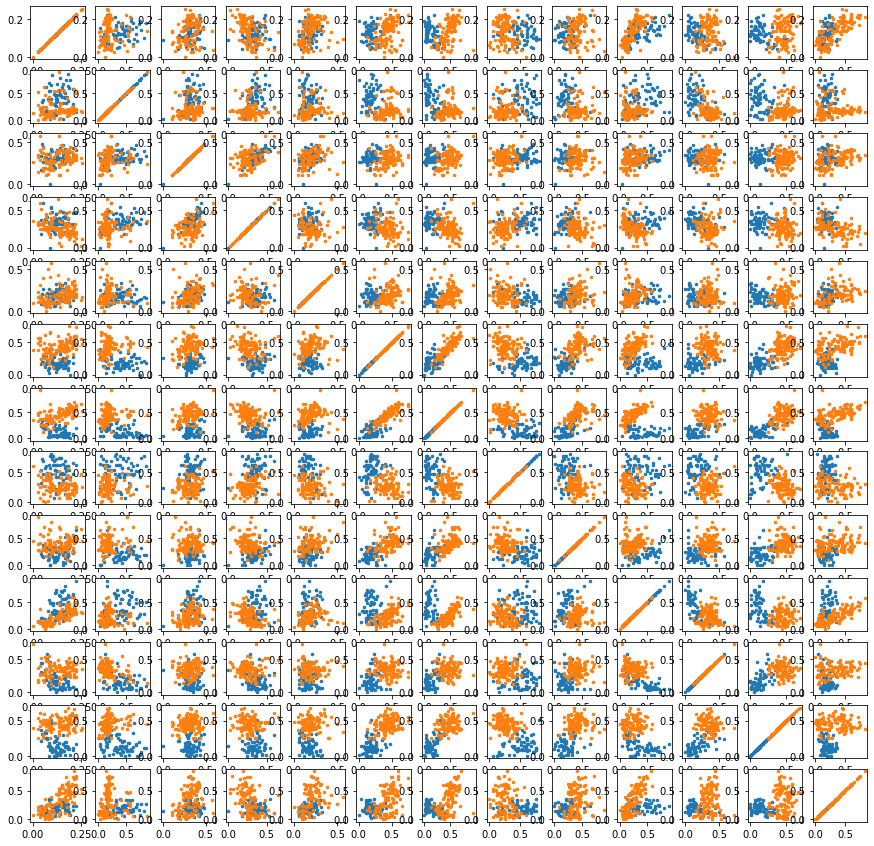

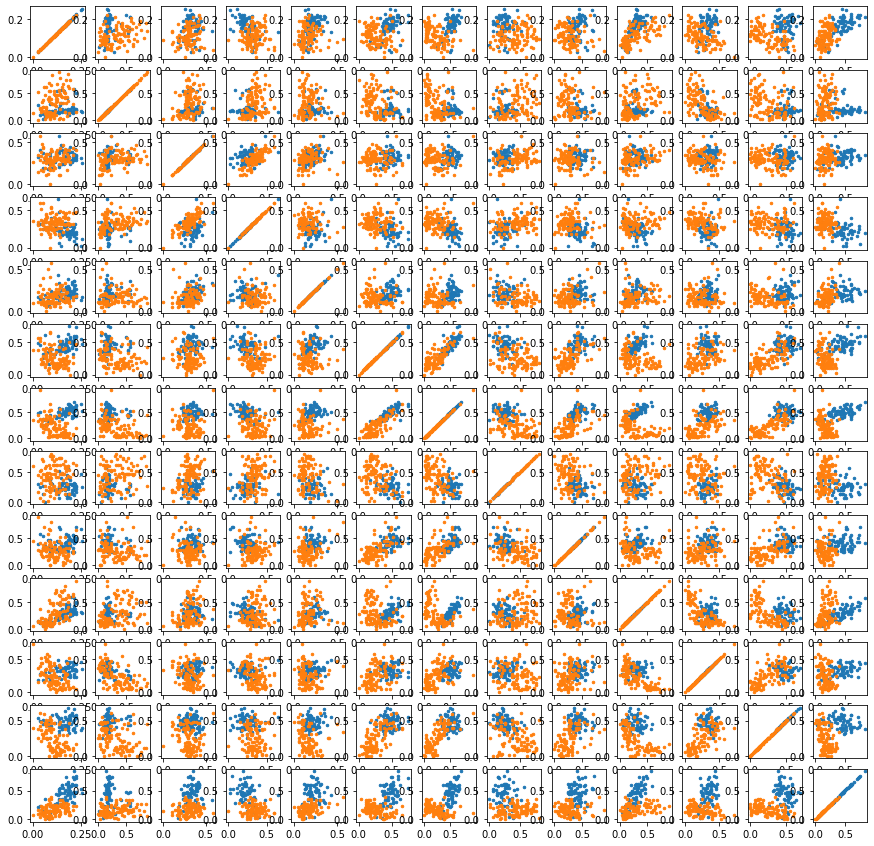

In [25]:
mu_init = np.hstack([0.2*np.ones((13,1)), 0.6*np.ones((13,1))])
#np.ones(shapem dtpe=Nonem order='C',like=None)
#dtype 기본값은 numpy.float64
#order='C' 다차원 데이터를 행 (C스타일) 열(F스타일)순서로 메모리에 저장할지 여부
#like=numpy 배열이 아닌 배열 생성을 허용하는 참조 개체
maxIter = 20

label1 = train_kmeans(X, mu_init, maxIter)
label2 = train_MoG(X, mu_init, maxIter)

plt.figure(figsize = (15, 15))

for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label1 == k,i],X[label1 == k,j],".",markersize = 5)

plt.figure(figsize = (15, 15))

for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label2 == k,i],X[label2 == k,j],".",markersize = 5)


<h3>2. Code 2는 polynomial regression을 수행하는 코드입니다. 아래의 조건을 만족하도록 BLANK를 채워 완성하세요</h3>
- BLANK1 : polynomial regression을 위한 design matrix를 만드는 코드를 작성하세요. polynomial의 차수 D를 수정하더라도 오류 없이 작동해야합니다.
- BLANK2 : Ridge regression의 해를 closed form으로 구하는 수식을 코드로 작성하세요


Text(0, 0.5, 'y')

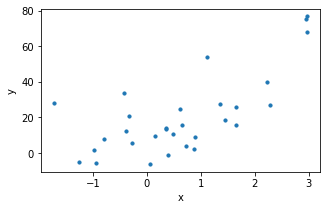

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N = 30
x = 5 * np.random.rand(N, 1) - 2
y = 4 + 2*x + 5*x**2 + 0.5*x**3 + 10*np.random.randn(N,1)
#y=3차방정식

plt.figure(figsize = (5,3))
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


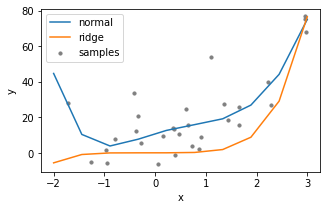

In [27]:
# polynomial regression
D = 6

# design matrix
# = 샘플수 * 입력의 수 (차원의 수)
X = np.ones((N,1))

#bias열 ,x ,x^2, x^3, x^4, x^5, x^6
# 왜냐면 6차원의 식을 만들어서 y햇을 예측하고 싶으니까.
for d in range(1, D):
    X = np.hstack([X,x**d])
        

# normal equation
#y.shape=Nx1
theta1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
# ridge regression
alpha = 1e4
theta2 = np.linalg.inv(X.T.dot(X)+(alpha*np.identity(D))).dot(X.T).dot(y)
        
# visualize
x_new = np.linspace(-2,3,10).reshape(-1,1)
y_new1 = theta1[0,0]
y_new2 = theta2[0,0]
        
for d in range(1, D):
    y_new1 = y_new1 + theta1[d,0]*x_new**d
    y_new2 = y_new2 + theta2[d,0]*x_new**d

        
plt.figure(figsize = (5,3))
plt.scatter(x,y,s=10,color='gray')
plt.plot(x_new,y_new1)
plt.plot(x_new,y_new2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['normal','ridge','samples'])
plt.savefig('ridge.eps')

#아래 오류는 plt.savefig()에서 발생.